# Step - 1: Import and Inspect Data...

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\dkdee\Downloads\calories_burned_unclean_1000.csv")

In [3]:
df

,Age,Gender,Weight_kg,Height_cm,Workout_Duration_min,Heart_Rate_avg,Steps_Count,Sleep_Hours,Water_Intake_Liters,Calories_Burned
0,57,Female,75.4,167.0,0,107,7668.0,7.0,1.36,22.3
1,60,Female,46.0,162.9,29,88,11857.0,8.1,1.69,84.5
2,29,Female,48.9,178.7,14,117,NaN,7.3,2.51,105.8
3,19,Other,55.0,180.8,15,94,NaN,7.8,1.60,26.4
4,36,Female,81.9,NaN,15,104,-325.0,4.6,1.08,64.0
...,...,...,...,...,...,...,...,...,...,...
995,25,Male,NaN,182.8,5,102,748.0,6.8,1.77,32.1
996,53,Female,54.3,162.8,NaN,89,2787.0,7.0,1.63,76.7
997,30,Male,70.2,180.1,24,129,4888.0,8.4,-0.08,151.6
998,46,Female,83.3,172.6,49,96,7314.0,5.8,NaN,326.4


In [4]:
#show first 5 rows
df.head()

,Age,Gender,Weight_kg,Height_cm,Workout_Duration_min,Heart_Rate_avg,Steps_Count,Sleep_Hours,Water_Intake_Liters,Calories_Burned
0,57,Female,75.4,167.0,0,107,7668.0,7.0,1.36,22.3
1,60,Female,46.0,162.9,29,88,11857.0,8.1,1.69,84.5
2,29,Female,48.9,178.7,14,117,NaN,7.3,2.51,105.8
3,19,Other,55.0,180.8,15,94,NaN,7.8,1.60,26.4
4,36,Female,81.9,NaN,15,104,-325.0,4.6,1.08,64.0


In [5]:
# it shows how many columns and rows in numbers
df.shape

(1000, 10)

In [6]:
# show data types
df.dtypes

Age                       int64
Gender                   object
Weight_kg               float64
Height_cm               float64
Workout_Duration_min     object
Heart_Rate_avg           object
Steps_Count             float64
Sleep_Hours             float64
Water_Intake_Liters     float64
Calories_Burned         float64
dtype: object

In [7]:
# check missing values
df.isnull().sum()

Age                      0
Gender                   0
Weight_kg               81
Height_cm               83
Workout_Duration_min    94
Heart_Rate_avg          91
Steps_Count             75
Sleep_Hours             65
Water_Intake_Liters     88
Calories_Burned          0
dtype: int64

# Step 2: check and fix Data Types

In [8]:
# convert the wrong data type values into NaN or numbers
df['Workout_Duration_min'] = pd.to_numeric(df['Workout_Duration_min'],errors = 'coerce')
df['Heart_Rate_avg'] = pd.to_numeric(df['Heart_Rate_avg'],errors = 'coerce')

In [9]:
# check after the conversion
df.dtypes

Age                       int64
Gender                   object
Weight_kg               float64
Height_cm               float64
Workout_Duration_min    float64
Heart_Rate_avg          float64
Steps_Count             float64
Sleep_Hours             float64
Water_Intake_Liters     float64
Calories_Burned         float64
dtype: object

In [10]:
# check missing values
df.isnull().sum()

Age                      0
Gender                   0
Weight_kg               81
Height_cm               83
Workout_Duration_min    99
Heart_Rate_avg          96
Steps_Count             75
Sleep_Hours             65
Water_Intake_Liters     88
Calories_Burned          0
dtype: int64

# Step 3: fill the missing values

In [11]:

#numeric cols handling by median

numeric_cols = df.select_dtypes(include=['int64','float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# categorical column handling by mode

categorical_col = df.select_dtypes(include =['object']).columns
for col in categorical_col:
     df[col]=df[col].fillna(df[col].mode()[0])

In [12]:
# after check if any missing value are there
df.isnull().sum()

Age                     0
Gender                  0
Weight_kg               0
Height_cm               0
Workout_Duration_min    0
Heart_Rate_avg          0
Steps_Count             0
Sleep_Hours             0
Water_Intake_Liters     0
Calories_Burned         0
dtype: int64

# Step 4: Outlier Detection and Handling

In [13]:
import numpy as np


In [14]:
numeric_cols = df.select_dtypes(include = ['number']).columns

for col in numeric_cols:
    q1 =df[col].quantile(0.25)
    q2 =df[col].quantile(0.75)
    iqr =q2 - q1  #Interquartile Range

    lower_lim =q1 - 1.5 * iqr
    upper_lim =q2 + 1.5 * iqr
    #remove outliears
    df = df[(df[col] >= lower_lim) & (df[col] <= upper_lim)]

print("Outliers handled successfully!")

Outliers handled successfully!



# Step 5: EDA (Explotary Data Analysis) 


In [15]:
#summary statistics
df.describe()

,Age,Weight_kg,Height_cm,Workout_Duration_min,Heart_Rate_avg,Steps_Count,Sleep_Hours,Water_Intake_Liters,Calories_Burned
count,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000,773.000000
mean,40.880983,70.083182,170.052264,20.227684,94.724450,5775.862872,6.964036,1.816494,87.154204
std,13.446644,13.084083,8.999366,14.960913,13.537527,3129.606174,1.186769,0.539513,79.553007
min,18.000000,35.600000,147.500000,0.000000,59.000000,-2524.000000,3.700000,0.360000,-73.800000
25%,29.000000,61.400000,164.000000,8.000000,86.000000,3727.000000,6.100000,1.460000,29.800000
50%,41.000000,70.400000,170.000000,18.000000,95.000000,5808.000000,7.000000,1.790000,70.800000
75%,52.000000,78.200000,175.800000,28.000000,104.000000,7770.000000,7.800000,2.170000,128.200000
max,64.000000,106.200000,193.200000,75.000000,131.000000,14182.000000,10.300000,3.240000,326.500000


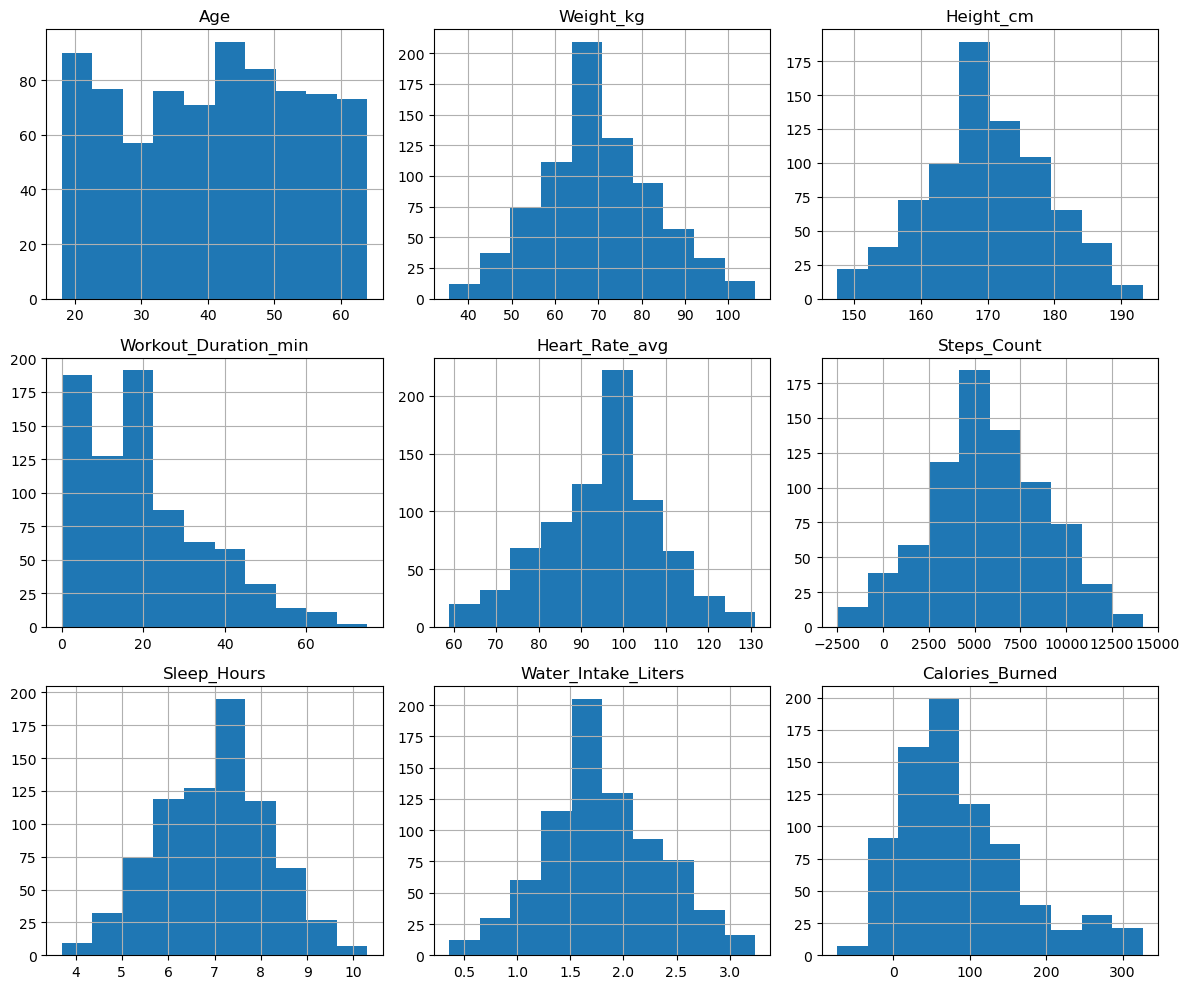

In [16]:
import matplotlib.pyplot as plt
#histogram graph

df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()


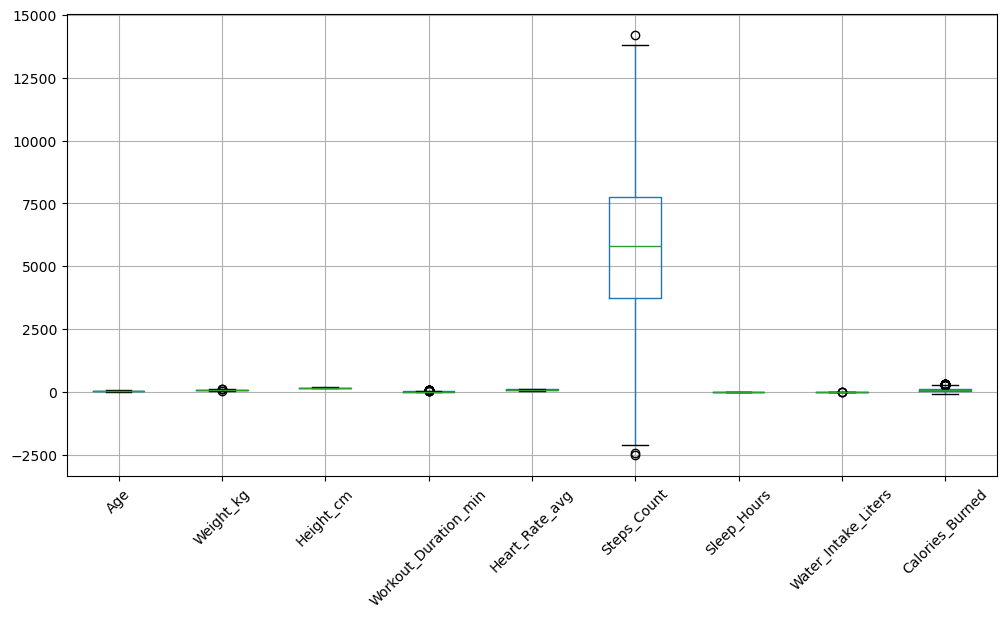

In [18]:
#boxplot
plt.figure(figsize=(12, 6))
df.boxplot()
plt.xticks(rotation=45)
plt.show()


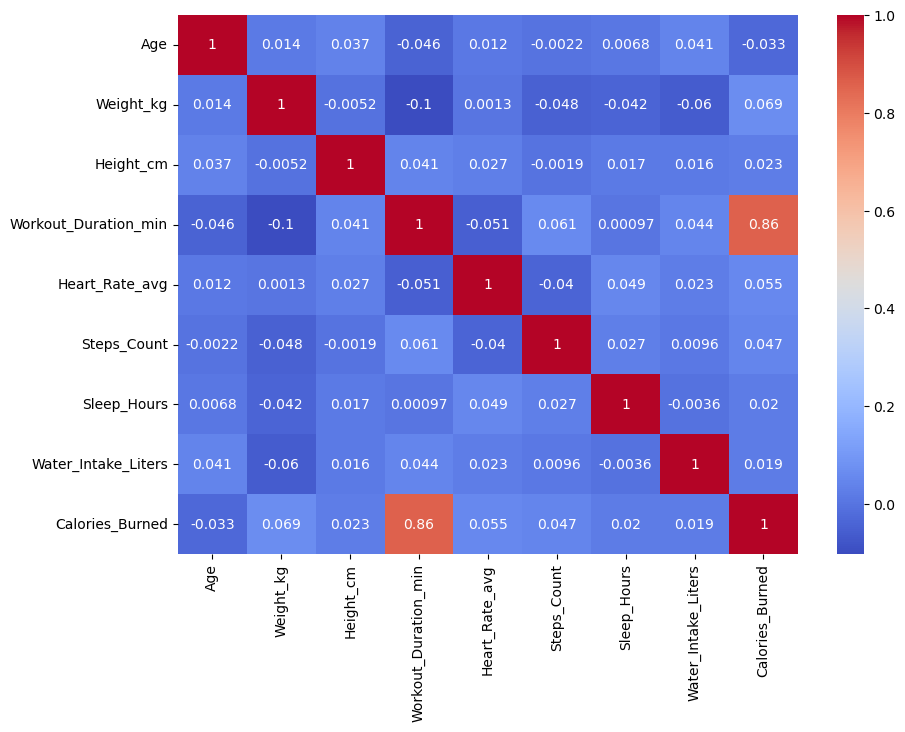

In [19]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(10, 7))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()



# Step 6: Encode categorical Data(Gender)

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


# Step 7: Train - Test split

In [21]:
from sklearn.model_selection import train_test_split

# X = all columns except Calories_Burned
#drop mean is except that
x = df.drop('Calories_Burned', axis=1)

# y = the target column
y = df['Calories_Burned']

# Train-test split (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (618, 9)
x_test shape: (155, 9)
y_train shape: (618,)
y_test shape: (155,)


# Step 8: Build Linear Regression Model

In [22]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [23]:
#creating a object for LinearRegression
model = LinearRegression()

# train the model 

model.fit(x_train, y_train)

# predict on test data

y_pred =model.predict(x_test)

# Step 9: Model Evaluation
     MAE -> Mean Absolute Error
     MSE -> Mean squared Error
     RMSE -> Root Mean Squared Error
     R(square) -> Accuracy of Model

In [24]:
#import functions to calculate errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse =np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [26]:
#primt results

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 31.66434773803952
Mean Squared Error (MSE): 1831.573332043753
Root Mean Squared Error (RMSE): 42.796884606753245
R² Score: 0.7612222422240583


# Step 9: Model selection and saving

In [27]:
# import models

from sklearn.ensemble import RandomForestRegressor
import joblib


In [28]:
# Models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)


    results[name] = {"MAE": mae, "RMSE": rmse, "R2": r2}


In [29]:
# for compare results
for model_name, metrics in results.items():
    print(f"{model_name} -> MAE: {metrics['MAE']:.2f}, RMSE: {metrics['RMSE']:.2f}, R2: {metrics['R2']:.3f}")


LinearRegression -> MAE: 31.66, RMSE: 42.80, R2: 0.761
Ridge -> MAE: 31.66, RMSE: 42.80, R2: 0.761
Lasso -> MAE: 31.68, RMSE: 42.80, R2: 0.761
RandomForest -> MAE: 32.37, RMSE: 43.56, R2: 0.753


In [30]:
#select and save best model

best_model = LinearRegression()
best_model.fit(x_train, y_train)
joblib.dump(best_model, "best_calorie_model.pkl")


['best_calorie_model.pkl']

# Step 10: Explainability - future importance / Coefficients

In [31]:
feature_names = x_train.columns  


In [32]:
coefficients = best_model.coef_
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.3f}")


Age: 0.123
Gender: 2.318
Weight_kg: 0.923
Height_cm: -0.142
Workout_Duration_min: 4.634
Heart_Rate_avg: 0.440
Steps_Count: 0.000
Sleep_Hours: 1.540
Water_Intake_Liters: -1.064


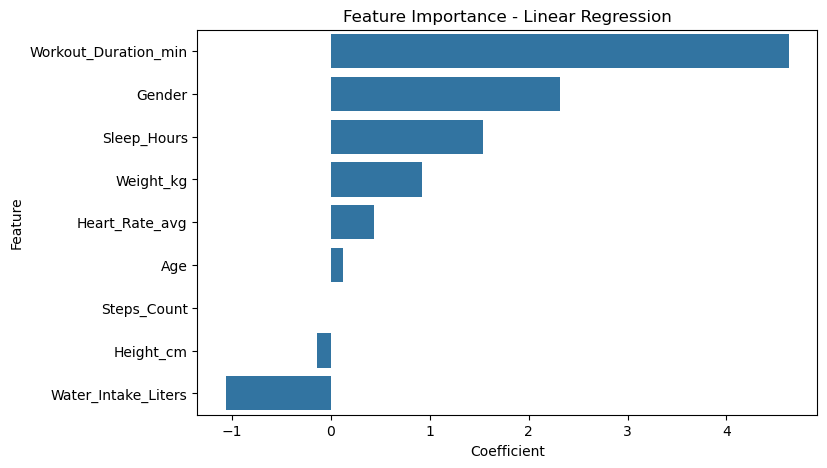

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance - Linear Regression')
plt.show()


# Step 11: deployment notes 

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example pipeline (if scaled)
pipeline = Pipeline([
    ('model', best_model)
])

pipeline.fit(x_train, y_train)
joblib.dump(pipeline, "calorie_model_pipeline.pkl")


['calorie_model_pipeline.pkl']

In [35]:
# Load saved pipeline
loaded_pipeline = joblib.load("calorie_model_pipeline.pkl")

# Example prediction
sample = x_test.iloc[0:1]  # first row from test set
predicted = loaded_pipeline.predict(sample)
print(f"Predicted Calories: {predicted[0]:.2f}")


Predicted Calories: 91.99
